In [1]:
import darknet_yolo as dyolo

In [49]:
from keras.preprocessing.image import load_img, img_to_array

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
yolo_model = dyolo.yolo_model('yolov3.weights','yolo_model.h5')

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [6]:
len(dyolo.labels)

80

In [7]:
for i in dyolo.labels:
    print(i,' ',end='')

person  bicycle  car  motorbike  aeroplane  bus  train  truck  boat  traffic light  fire hydrant  stop sign  parking meter  bench  bird  cat  dog  horse  sheep  cow  elephant  bear  zebra  giraffe  backpack  umbrella  handbag  tie  suitcase  frisbee  skis  snowboard  sports ball  kite  baseball bat  baseball glove  skateboard  surfboard  tennis racket  bottle  wine glass  cup  fork  knife  spoon  bowl  banana  apple  sandwich  orange  broccoli  carrot  hot dog  pizza  donut  cake  chair  sofa  pottedplant  bed  diningtable  toilet  tvmonitor  laptop  mouse  remote  keyboard  cell phone  microwave  oven  toaster  sink  refrigerator  book  clock  vase  scissors  teddy bear  hair drier  toothbrush  

In [73]:
imgs = ['computers.jpg','kite.jpg','person with dog.jpg','dog.jpg']

In [9]:
import matplotlib.pyplot as plt

In [13]:
from skimage.transform import resize

In [16]:
from numpy import expand_dims

In [12]:
w,h=416,416

In [62]:
def preprocess_image(im, shape):
    img = load_img(im)
    width, height = img.size
    
    img = load_img(im, target_size=shape)
    img = img_to_array(img)
    img = img.astype('float32')
    img /= 255    
    img = expand_dims(img,0)    
    return img, width,height

In [83]:
ind = 1

In [84]:
image,width,height = preprocess_image(imgs[ind],(w,h))

In [85]:
(yhat, (boxes, pred, conf)) = dyolo.prediction(yolo_model, image, width, height)

In [86]:
boxes

In [87]:
pred

['kite']

In [88]:
conf

[90.8883273601532]

In [89]:
len(yhat)

3

In [90]:
yhat[0].shape

(1, 13, 13, 255)

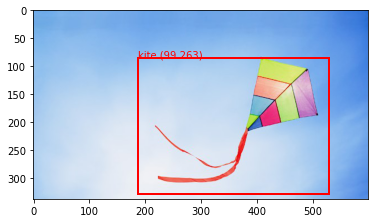

In [91]:
dyolo.draw_boxes(imgs[ind], boxes, pred, prob)

# Automatic Learning/ AutoML

In [93]:
!pip install automl --user

  Using cached automl-2.9.9-py2.py3-none-any.whl (71 kB)
Processing c:\users\hp\appdata\local\pip\cache\wheels\da\03\f6\41ff217c2d88b1446b2d593d5b7433b9e823f1ee52e798e4f2\dill-0.2.9-py3-none-any.whl
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
Processing c:\users\hp\appdata\local\pip\cache\wheels\29\d4\25\6d39525150f3e81c3a8d5dd4f7694c3047470c3c6fc7e70bfc\sklearn_deap2-0.2.2-py3-none-any.whl
  Using cached lightgbm-2.0.12-py2.py3-none-win_amd64.whl (431 kB)
  Using cached pathos-0.2.8-py2.py3-none-any.whl (81 kB)
  Using cached multiprocess-0.70.12.2-py38-none-any.whl (128 kB)
  Using cached ppft-1.6.6.4-py3-none-any.whl (65 kB)
  Using cached pox-0.3.0-py2.py3-none-any.whl (30 kB)


ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow-gpu 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: multiprocess 0.70.12.2 has requirement dill>=0.3.4, but you'll have dill 0.2.9 which is incompatible.
ERROR: pathos 0.2.8 has requirement dill>=0.3.4, but you'll have dill 0.2.9 which is incompatible.


In [95]:
!pip install autokeras --user

  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


ERROR: automl 2.9.9 has requirement h5py<3.0,>=2.7.0, but you'll have h5py 3.1.0 which is incompatible.


In [99]:
!pip install six

In [101]:
# import auto_ml as am
import autokeras as ak

In [ ]:
ak.ImageClassifier()
ak.TextClassifier()
ak.StructuredDataRegressor()

In [102]:
import pandas as pd

In [105]:
!pip install --upgrade pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


ERROR: automl 2.9.9 has requirement h5py<3.0,>=2.7.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: automl 2.9.9 has requirement pandas<1.0,>=0.18.0, but you'll have pandas 1.3.1 which is incompatible.


In [106]:
df = pd.read_csv('housing.csv')

In [107]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [108]:
x = df.drop(['Price','Address'],axis=1)
y = df['Price']

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=100)

In [111]:
search_model = ak.StructuredDataRegressor(max_trials=2, loss='mean_absolute_error')

In [112]:
search_model.fit(xtrain, ytrain, epochs=10, verbose=3)

Trial 2 Complete [00h 00m 08s]
val_loss: 1210558.25

Best val_loss So Far: 1210357.875
Total elapsed time: 00h 00m 16s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


In [113]:
search_model.evaluate(xtest,ytest)

40/40 [==============================] - 0s 2ms/step - loss: 1218433.0000 - mean_squared_error: 1612653527040.0000


[1218433.0, 1612653527040.0]

In [114]:
best_model = search_model.export_model()

In [115]:
best_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
normalization (Normalization (None, 5)                 11        
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [116]:
from keras.datasets import cifar10

In [117]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

In [120]:
imgclf = ak.ImageClassifier(num_classes=10,max_trials=2)

In [ ]:
imgclf.fit(xtrain,ytrain,epochs=1,validation_data=(xtest,ytest),verbose=3)

Trial 1 Complete [00h 03m 20s]
val_loss: 1.0438497066497803

Best val_loss So Far: 1.0438497066497803
Total elapsed time: 00h 03m 20s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
image_block_1/b...|resnet            |vanilla           
image_block_1/n...|True              |True              
image_block_1/a...|True              |False             
image_block_1/i...|True              |None              
image_block_1/i...|True              |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0.1               |None              
image_block_1/i...|0                 |None              
image_block_1/r...|False             |None              
image_block_1/r...|resnet50          |None              
image_block_1/r...|True              |None              
classification_...|global_avg        |flatten           
classification_...|0                 |0.5